# Laboratory #4_1 : Image Classification using CNN

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

**Authors**
- Joaquim Marset Alsina
- Jesús Molina Rodríguez de Vera

# **Colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

In [ ]:
# mount drive to the notebook

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt

from tensorflow import keras
from keras.backend import clear_session
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from skimage.transform import resize

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




170508288/170498071 [==============================] - 6s 0us/step


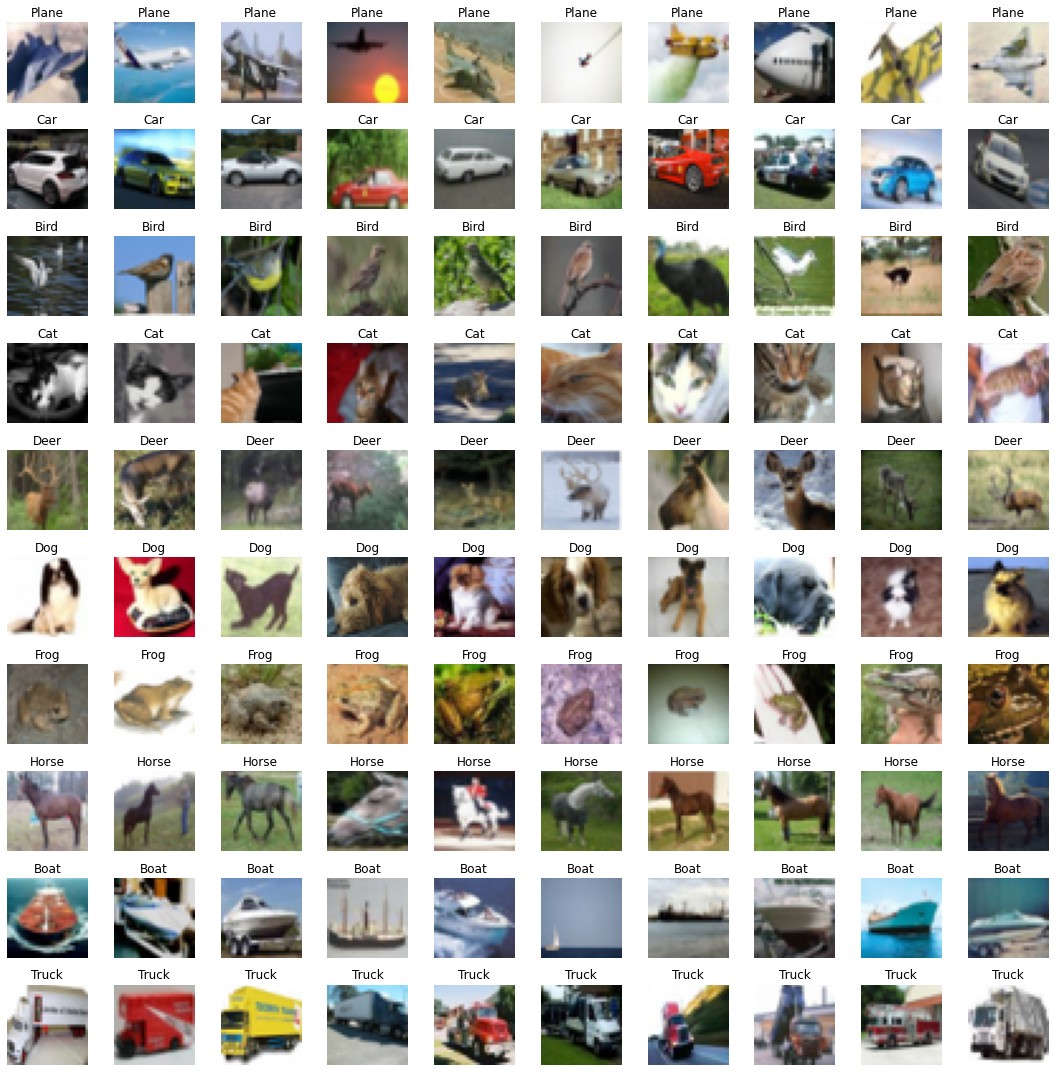

In [ ]:
# solution
labels = ["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Boat", "Truck"] 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

fig, axes = plt.subplots(10, 10)

fig.set_size_inches(15,15)

for i in range(10):
  idx = np.random.choice(np.where(y_train.flatten()==i)[0], 10)
  for j, img in enumerate(x_train[idx]):
    ax = axes[i,j]
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(labels[i])

fig.tight_layout()

# Normalize
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Convert to one-hot encoded form
y_train_ohe = to_categorical(y_train, num_classes=10)
y_test_ohe = to_categorical(y_test, num_classes=10)

In [ ]:
# Classes are balanced in the training set
y_train_ohe.sum(axis=0)

array([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000.], dtype=float32)

## Define the following model (same as the one in tutorial)

**For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. Use the input as (32,32,3). The filter maps can then be flattened to provide features to the classifier. Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).**

In [ ]:
clear_session()

In [ ]:
# solution
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32 ,3), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 100)               720100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
__________________________________________________

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 32 epochs with a batch size of 512.

In [ ]:
# solution
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train_ohe, batch_size=512, epochs=32, validation_split=0.1)

Epoch 1/32
88/88 [==============================] - 7s 21ms/step - loss: 2.2498 - accuracy: 0.1754 - val_loss: 2.1928 - val_accuracy: 0.2222
Epoch 2/32
88/88 [==============================] - 1s 16ms/step - loss: 2.1317 - accuracy: 0.2500 - val_loss: 2.0704 - val_accuracy: 0.2814
Epoch 3/32
88/88 [==============================] - 1s 16ms/step - loss: 2.0206 - accuracy: 0.2937 - val_loss: 1.9794 - val_accuracy: 0.3090
Epoch 4/32
88/88 [==============================] - 1s 16ms/step - loss: 1.9479 - accuracy: 0.3173 - val_loss: 1.9283 - val_accuracy: 0.3238
Epoch 5/32
88/88 [==============================] - 2s 18ms/step - loss: 1.9027 - accuracy: 0.3346 - val_loss: 1.8885 - val_accuracy: 0.3294
Epoch 6/32
88/88 [==============================] - 1s 17ms/step - loss: 1.8732 - accuracy: 0.3448 - val_loss: 1.8619 - val_accuracy: 0.3440
Epoch 7/32
88/88 [==============================] - 1s 16ms/step - loss: 1.8469 - accuracy: 0.3585 - val_loss: 1.8356 - val_accuracy: 0.3598
Epoch 8/32
88

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 512 epochs with a batch size of 32. We will use VGG model as the architecture.

**Stack two convolutional layers with 32 filters, each of 3 x 3 followed by max pooling layer. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**


In [ ]:
clear_session()

In [ ]:
# solution
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 32 epochs with a batch size of 512.

In [ ]:
# solution
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history_vgg = model.fit(x_train, y_train_ohe, batch_size=512, epochs=32, validation_split=0.1)

Epoch 1/32
88/88 [==============================] - 3s 31ms/step - loss: 2.2722 - accuracy: 0.1429 - val_loss: 2.2357 - val_accuracy: 0.1800
Epoch 2/32
88/88 [==============================] - 2s 24ms/step - loss: 2.1922 - accuracy: 0.2119 - val_loss: 2.1415 - val_accuracy: 0.2368
Epoch 3/32
88/88 [==============================] - 2s 25ms/step - loss: 2.0916 - accuracy: 0.2559 - val_loss: 2.0415 - val_accuracy: 0.2850
Epoch 4/32
88/88 [==============================] - 2s 24ms/step - loss: 2.0022 - accuracy: 0.2957 - val_loss: 1.9806 - val_accuracy: 0.2784
Epoch 5/32
88/88 [==============================] - 2s 24ms/step - loss: 1.9617 - accuracy: 0.3124 - val_loss: 1.9232 - val_accuracy: 0.3262
Epoch 6/32
88/88 [==============================] - 2s 24ms/step - loss: 1.9196 - accuracy: 0.3270 - val_loss: 1.9005 - val_accuracy: 0.3254
Epoch 7/32
88/88 [==============================] - 2s 24ms/step - loss: 1.8921 - accuracy: 0.3413 - val_loss: 1.8832 - val_accuracy: 0.3458
Epoch 8/32
88

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

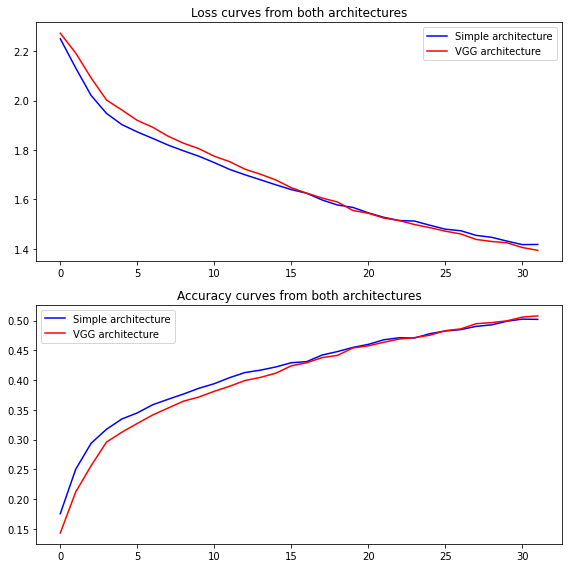

In [ ]:
# solution
fig, axs = plt.subplots(2, 1)
fig.set_size_inches((8, 8))

axs[0].plot(history.history['loss'], color='blue', label='Simple architecture')
axs[0].plot(history_vgg.history['loss'], color='red', label='VGG architecture')
axs[0].set_title('Train loss curves from both architectures')
axs[0].legend()

axs[1].plot(history.history['accuracy'], color='blue', label='Simple architecture')
axs[1].plot(history_vgg.history['accuracy'], color='red', label='VGG architecture')
axs[1].set_title('Train accuracy curves from both architectures')
axs[1].legend()

fig.tight_layout()

**Solution**

As we can observe, the performance of both architectures is almost the same when reaching the 32 epochs. At the very beginning, the deeper architecture presents a little bit more loss and less accuracy. However, this difference should not be taken into account very much given the random initialization of weights of the different layers and that they quickly present similar values.

Besides, as we have said, the difference at the end of the training is almost the same, being the accuracy 1% better with the deeper architecture. With 32 epochs we are only able to reach 50% of train accuracy. Also, both the train and validation accuracy are almost the same (look at the training logs of each network). This is preferable, given that it means that we do not have overfit in the training set (i.e. low variance). But, we have a lot of bias because the performance of the model is not very good (we are underfitting), and the model is not able to adjust correctly the train set, and it is not able to properly classify the different classes.

Therefore, adding more layers with that small number of epochs is not helping very much to obtain better results. Looking at the learning curves, we should probably increase the number of epochs rather than increase the network's number of parameters, as we can observe that both networks still had a great room for improvement.

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
# solution
test_predicted_probs = model.predict(x_test)
test_predicted_classes = np.argmax(test_predicted_probs, axis=1)

test_classes = y_test[:, 0]

confusion_matrix(test_classes, test_predicted_classes)

#labels = ["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Boat", "Truck"] 

array([[522,  69,  68,  20,  14,   5,  37,   8, 220,  37],
       [ 28, 719,   7,  10,   4,   2,  27,  14,  79, 110],
       [ 78,  39, 377,  80, 115,  53, 155,  44,  42,  17],
       [ 31,  34, 108, 351,  51, 120, 210,  29,  19,  47],
       [ 40,  22, 163,  55, 369,  35, 209,  62,  32,  13],
       [ 17,  10, 129, 257,  61, 290, 119,  70,  34,  13],
       [  4,  32,  64,  52,  52,  15, 737,  10,  19,  15],
       [ 36,  21,  67,  81,  99,  46,  71, 495,  21,  63],
       [ 85,  92,  19,  16,   5,   3,  18,   7, 705,  50],
       [ 33, 256,  13,  21,   6,   8,  47,  19, 116, 481]])

**Solution**

As we could expect given the training curves, the confusion matrix is not very good. Typically, we would like to see a sparser matrix with some 0s outside the main diagonal, meaning that it is not doing that many wrong predictions. However, we do not observe this behaviour and rather, we have a considerable number of false positives and false negatives per class.  We believe that this behaviour is because the model has not learnt enough, as we have stopped the training while the results were still improving.

There is a particular class (dog) that the classifier is mixing quite a lot, given that the number of true positives is only 290, whereas the number of false negatives is a lot bigger. Particularly, we can see only 257 false negatives classified as cats, which is quite possible taking into account these are classes that present some features in common from a visual point of view. 

Other classes that seem to share a similar problem are bird, cat, deer and frog. In all cases we see that is making a considerable amount of false positives, meaning that is failing quite a bit to distinguish these animals. If we look at the images shown at the beginning, this can be more or less reasonable, given that in some images the animal is quite zoomed in and we cannot tell the difference in size a frog and a dog should have for example. Moreover, in all these classes most of the images appear as simple entities with a more or less plain background. Also, the pose they are showing can be prone to misunderstanding.  
However, it is interesting to see that the number of false positives when classifying horses is not that big, probably because of their leg size, although it is hard to tell.

We have a similar problem with car and truck, given that 256 instances are trucks and classified as cars. This is easy to understand, given that they share a lot of features, and in some images is even difficult to distinguish one from the other. Moreover they are also usually in similar environments (roads), so this information doesn't help either the network to discriminate them properly.

We can also see that planes are frequently (220 cases) confused with boats. That can be more or less reasonable, given that in both cases the background is plain blue, which seems to lead the network to confusion.

*    Print the test accuracy for the trained model.

In [ ]:
# solution
test_loss, test_acc = model.evaluate(x_test, y_test_ohe)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 1.3858 - accuracy: 0.5046
Test loss: 1.3858497142791748
Test accuracy: 0.5045999884605408


## Define the complete VGG architecture.

**Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, follwed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**

*   Change the size of input to 64 x 64.

Please note that we are resizing the images offline, which could cause out-of-memory problems while training the network. Because of that we explicitly delete some unused objects and call the garbage collector to free as much memory as possible.

Another possibility would have been using a [Keras resizing layer](https://keras.io/api/layers/preprocessing_layers/image_preprocessing/resizing/) at the beginning of the network. This online resizing does not require as much memory as the other approach but requires resizing the images every time they are fed to the network.

In [ ]:
import gc
del model
clear_session()
gc.collect()

4977

In [ ]:
x_train_resized = np.zeros((x_train.shape[0], 64, 64, 3))
for i in range(x_train.shape[0]):
    x_train_resized[i] = resize(x_train[i], (64, 64, 3))

del x_train
gc.collect()

88

In [ ]:
# solution

model = keras.Sequential()
#model.add(keras.layers.Resizing(64, 64, input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 100 epochs with a batch size of 32.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# solution
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history_complete_vgg = model.fit(x_train_resized, y_train_ohe, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
1407/1407 [==============================] - 34s 23ms/step - loss: 2.1368 - accuracy: 0.2039 - val_loss: 1.9724 - val_accuracy: 0.2714
Epoch 2/100
1407/1407 [==============================] - 32s 23ms/step - loss: 1.8287 - accuracy: 0.3402 - val_loss: 1.7120 - val_accuracy: 0.3966
Epoch 3/100
1407/1407 [==============================] - 32s 22ms/step - loss: 1.5768 - accuracy: 0.4338 - val_loss: 1.6026 - val_accuracy: 0.4120
Epoch 4/100
1407/1407 [==============================] - 32s 23ms/step - loss: 1.4265 - accuracy: 0.4898 - val_loss: 1.4401 - val_accuracy: 0.4834
Epoch 5/100
1407/1407 [==============================] - 32s 23ms/step - loss: 1.3216 - accuracy: 0.5298 - val_loss: 1.3070 - val_accuracy: 0.5354
Epoch 6/100
1407/1407 [==============================] - 32s 23ms/step - loss: 1.2293 - accuracy: 0.5661 - val_loss: 1.3531 - val_accuracy: 0.5114
Epoch 7/100
1407/1407 [==============================] - 32s 23ms/step - loss: 1.1382 - accuracy: 0.5970 - val_loss: 1

We can see that this more complex network is achieving more train and validation accuracy in only 5 epochs than the other simpler models we have seen before in 32 epochs. It achieves a perfect train accuracy in 58 epochs. Now we do not have underfitting anymore, but now we could have overfitting. Since the 58th epoch, the training accuracy is at the maximum, but the validation accuracy is not improving either and it is stalled at 0.7. We do not observe a progressive decrease in the validation accuracy that could be expected in an overfitting situation. However, the validation loss does increase notably from the 58th epoch, which is indicative of overfitting. Therefore, we could have added some mechanism of early stopping to avoid doing the remaining 42 epochs or stop the network once the validation loss stops improving for a given number of epochs. Keras permits it by adding callbacks ([Keras Early stopping](https://keras.io/api/callbacks/early_stopping/)).

The overfitting means that the model has adjusted too much, in fact perfectly, to the training set, losing the ability to generalize to new data, explaining why the validation accuracy is not improving. This variance typically results in the model not doing that well with unseen data compared to those instances of the train set.

We have to note, however, that even though we are completely overfitting the train set, we are obtaining better validation accuracies, meaning that it is to be expected that the model will perform better in the test set compared to the previous models. This was expected given that we have more convolutional layers, and more filters per layer, meaning that the network is more complex and it will be able to learn to recognize more complex patterns that will permit making fewer classification errors.

In [ ]:
del x_train_resized
gc.collect()

2437

In [ ]:
x_test_resized = np.zeros((x_test.shape[0], 64, 64, 3))
for i in range(x_test.shape[0]):
    x_test_resized[i] = resize(x_test[i], (64, 64, 3))
del x_test
gc.collect()

88

In [ ]:
test_predicted_probs = model.predict(x_test_resized)
test_predicted_classes = np.argmax(test_predicted_probs, axis=1)

test_classes = y_test[:, 0]
print(confusion_matrix(test_classes, test_predicted_classes))

test_loss, test_acc = model.evaluate(x_test_resized, y_test_ohe)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

[[756  17  48  19  21   5  15  14  68  37]
 [ 25 798   8   9   2  10  14   5  20 109]
 [ 58   6 594  73  74  63  69  36  15  12]
 [ 16  13  65 501  66 169  86  36  19  29]
 [ 23   3  75  64 641  45  58  72  11   8]
 [ 10   6  53 171  68 586  33  52  13   8]
 [  6   8  36  55  47  37 785   9   5  12]
 [ 18   4  29  48  78  65  14 724   8  12]
 [ 72  39  15  22  14   4  10   6 793  25]
 [ 33  97  17  24   5  23   6  28  29 738]]
313/313 [==============================] - 3s 9ms/step - loss: 3.4286 - accuracy: 0.6916
Test loss: 3.4286088943481445
Test accuracy: 0.6916000247001648


As we have said above, and as we can see in the confusion matrix, we are getting better results than before. The number of true positives of each class is now bigger, and the number of false positives and false negatives has reduced quite a bit.

It is true, however, that we still have some problems mixing cats with dogs, given that we have 171 dogs that are classified as cats. Also, we see a big number of cars being classified as trucks (109), and 97 trucks classified as cars. This much is to be expected, given the overfitting we have explained, leading to the acceptable accuracy of 70%, and that the classes the classifier is mixing more are those that are easier to be mixed, as we have explained before.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Solution**

The activation function is a function that is applied to the output of each neuron, after computing the product of the weights of that neuron by the activations of the previous layers and adding the possible bias. Typically, the activation functions are non-linear.  
The reason for the activation function to be non-linear is because the previous computation is already computing a linear function of the inputs, so computing a linear function of a linear function has the same representation ability as a single linear function (composition of linear functions is a linear function). That is, if the activation functions were linear, it would not matter how many layers we could stack, the model would not be more expressive than a single linear function. Therefore, the activation functions are used to add more expressivity, permitting to learn complex functions of the inputs.

We can use both of these two functions as output activations for classification networks. The main difference between them is the number of classes that the networks in which they are used can classify. In both cases, we are outputting, given an instance (image in this notebook), the probability of this instance belonging to different classes.
- In the case of the sigmoid, a single neuron allows us to classify 2 classes: belonging or not belonging to a particular class. The probability of the instance belonging to class would be the output of the network, and the probability of not belonging to it is given by subtracting 1 from it.

$$
S(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{e^{x}+1}}
$$

- In the case of the softmax activation function, we can have $N$ output neurons to classify $N$ different classes. Each one of the neurons would output the probability of an instance belonging to each class. In this case, the classes are considered disjoints, so the sum of all the probabilities must be one.

$$
softmax (\mathbf {x} )_{i}={\frac {e^{x_{i}}}{\sum _{j=1}^{N}e^{x_{j}}}}
$$

where $\mathbf{x}=(x_1,\dots, x_N)$ are the outputs of the $N$ neurons (prior to the activation function).


More concretely, sigmoid is a particular class of the softmax activation when the number of classes we want to predict is 2 (more information on that in this [Wikipedia page](https://en.wikipedia.org/w/index.php?title=Logistic_regression&oldid=755697139#As_a_.22log-linear.22_model))

Previously, we have discussed the case of classification problems in which the classes are disjoint. That is, a given instance belongs to one and only one of the considered classes. However, what if we had an scenario in which an instance can be a member of several classes at the same time? That is what we call multi-label classification. In this case, we are not interested in THE class an object belongs to, but for EVERY class if it belongs to it or not. Therefore, we could use $N$ output neurons with sigmoid actiavtion functions, each one representing the probability of the object being a member of a particular class. However, contrary to the case of te softmax activation, those probabilities do not need to sum up one. The classes are treated "independently". Some approaches ([see this paper](https://arxiv.org/pdf/1810.11671.pdf)) have been proposed to apply softmax to multi-label classification problems, but that is not commonly seen.

To understand those two losses, it is important to start talking about the cross-entropy loss. From now on, we will consider the input to the network "fixed", that is, we will not refer explicitly to it and we will focus only on the outputs of the network and the true labels of that instance. The cross-entropy loss measures the difference between two probability distributions, and it is given by the formula:

$$
CE = -\sum_{i}^{N}y_{i} log (\hat{y}_{i})
$$

where $y_i$ is the value of the one-hot encoded for the i-th class for the considered instance (1 if the object belongs to class $i$ and 0 otherwise) and $\hat{y}_i$ is the output of the network for the i-th class for a given instance.

The categorical cross-entropy loss is a particular version of the cross-entropy loss that is typically used for multiclass classification with the softmax activation function. Here, we assume disjoint classes, so only one $y_p$ would equal to $1$ and the others would be $0$. Therefore, it is given by the following expression:

$$
-log\left ( \frac{e^{x_{p}}}{\sum_{j}^{N} e^{x_{j}}} \right ) = -log (\hat{y}_p)
$$

In other words, all the terms but the one corresponding to the true class are null.

The binary cross-entropy loss is another particular version of the cross-entropy loss, that is frequently used for binary classification with sigmoid activation. The formula is given by:

$$
 -\sum_{i=1}^{N=2}y_{i} log (\hat{y}_i) = -y_{1} log(\hat{y}_1) - (1 - y_{1}) log(1 - \hat{y}_1)
$$
It is clear that only one of those terms would be different from zero (as we are in a binary classification problem). It is easy to show that in the case of binary classification the categorical cross-entropy loss with the softmax activation leads to the same expression as the binary cross-entropy loss with a sigmoid output.

Additionally, and related to the comment above, binary cross-entropy loss is also commonly used in multi-label classification. It can be used to solve each binary classification subproblem (belongs to class $i$ or not) for each one of the $N$ classes, computing the aggregated loss for every one of them.


---

## **End of P4_1: Image Classification using CNN**
Deadline for P4_1 submission in CampusVirtual is: **Monday, the 29th of November, 2021**